In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.5.0'

In [2]:
import sys
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time
import itertools
import random

from sklearn.utils import shuffle
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout
from tensorflow.keras.models import Model

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense

from tensorflow.keras.layers import Layer
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# **Step 1- Load the dataset and create the metadata.**








In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
project_path = "/content/drive/MyDrive/Mod 9-Computer Vision/Project2/part2/Part 3 - Aligned Face Dataset from Pinterest.zip"

In [5]:
from zipfile import ZipFile

with ZipFile(project_path, 'r') as z:
  z.extractall()

In [6]:
!ls

drive  pins  PINS  sample_data


In [ ]:
path="./PINS/"

In [ ]:
# Get the list of all directories and sort them
dir_list = next(os.walk(path))[1]
dir_list.sort()

In [ ]:
dir_list

['pins_Aaron Paul',
 'pins_Alvaro Morte',
 'pins_Amanda Crew',
 'pins_Amaury Nolasco',
 'pins_Anna Gunn',
 'pins_Benedict Cumberbatch',
 'pins_Betsy Brandt',
 'pins_Brenton Thwaites',
 'pins_Brit Marling',
 'pins_Bryan Cranston',
 'pins_Caity Lotz',
 'pins_Cameron Monaghan',
 'pins_Chance Perdomo',
 'pins_Chris Evans',
 'pins_Chris Pratt',
 'pins_Cobie Smulders',
 'pins_Danielle Panabaker',
 'pins_Dave Franco',
 'pins_Dominic Purcell',
 'pins_Dwayne Johnson',
 'pins_Emilia Clarke',
 'pins_Emily Bett Rickards',
 'pins_Emma Stone',
 'pins_Gwyneth Paltrow',
 'pins_Henry Cavil',
 'pins_Jason Momoa',
 'pins_Jeremy Renner',
 'pins_Jesse Eisenberg',
 'pins_Jim Parsons',
 'pins_Jon Bernthal',
 'pins_Josh Radnor',
 'pins_Kit Harington',
 'pins_Krysten Ritter',
 'pins_Kumail Nanjiani',
 'pins_Maisie Williams',
 'pins_Mark Ruffalo',
 'pins_Martin Starr',
 'pins_Melissa benoit',
 'pins_Mike Colter',
 'pins_Morena Baccarin',
 'pins_Morgan Freeman',
 'pins_Natalie Portman ',
 'pins_Neil Patrick Harr

In [ ]:
len(dir_list)

100

## **Preparing y_train (labels)** 

In [ ]:
Labels=[]
for i in range (len(dir_list)):
  temp=dir_list[i]
  name=temp.split('_')
  lab=name[-1]
  Labels.append(lab)
print(Labels)

['Aaron Paul', 'Alvaro Morte', 'Amanda Crew', 'Amaury Nolasco', 'Anna Gunn', 'Benedict Cumberbatch', 'Betsy Brandt', 'Brenton Thwaites', 'Brit Marling', 'Bryan Cranston', 'Caity Lotz', 'Cameron Monaghan', 'Chance Perdomo', 'Chris Evans', 'Chris Pratt', 'Cobie Smulders', 'Danielle Panabaker', 'Dave Franco', 'Dominic Purcell', 'Dwayne Johnson', 'Emilia Clarke', 'Emily Bett Rickards', 'Emma Stone', 'Gwyneth Paltrow', 'Henry Cavil', 'Jason Momoa', 'Jeremy Renner', 'Jesse Eisenberg', 'Jim Parsons', 'Jon Bernthal', 'Josh Radnor', 'Kit Harington', 'Krysten Ritter', 'Kumail Nanjiani', 'Maisie Williams', 'Mark Ruffalo', 'Martin Starr', 'Melissa benoit', 'Mike Colter', 'Morena Baccarin', 'Morgan Freeman', 'Natalie Portman ', 'Neil Patrick Harris', 'Paul Rudd', 'Pedro Alonso', 'Peter Dinklage', 'RJ Mitte', 'Rami Melek', 'Robert Knepper', 'Robin Taylor', 'Ryan Reynolds', 'Sarah Wayne Callies', 'Scarlett Johansson', 'Sebastian Stan', 'Sophie Turner', 'Stephen Amell', 'Sundar Pichai', 'Thomas Middle

In [ ]:
y_train=[]
i=0
for i in range(len(dir_list)):
  images=os.listdir(path+dir_list[i]) 
  for img in images:
    y_train.append(i)
  i=i+1


In [ ]:
len(y_train)

10770

In [ ]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

## **Preparing x_train**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

x_train=[]
for i in range(len(dir_list)):
  images=os.listdir(path+dir_list[i])
  for ii in images:
    image = cv2.imread(path+dir_list[i]+'/'+ii)
    x_train.append(image)

In [ ]:
len(x_train),len(y_train)

(10770, 10770)

# **Step 2- Check some samples of metadata.**

In [ ]:
print(Labels)

['Aaron Paul', 'Alvaro Morte', 'Amanda Crew', 'Amaury Nolasco', 'Anna Gunn', 'Benedict Cumberbatch', 'Betsy Brandt', 'Brenton Thwaites', 'Brit Marling', 'Bryan Cranston', 'Caity Lotz', 'Cameron Monaghan', 'Chance Perdomo', 'Chris Evans', 'Chris Pratt', 'Cobie Smulders', 'Danielle Panabaker', 'Dave Franco', 'Dominic Purcell', 'Dwayne Johnson', 'Emilia Clarke', 'Emily Bett Rickards', 'Emma Stone', 'Gwyneth Paltrow', 'Henry Cavil', 'Jason Momoa', 'Jeremy Renner', 'Jesse Eisenberg', 'Jim Parsons', 'Jon Bernthal', 'Josh Radnor', 'Kit Harington', 'Krysten Ritter', 'Kumail Nanjiani', 'Maisie Williams', 'Mark Ruffalo', 'Martin Starr', 'Melissa benoit', 'Mike Colter', 'Morena Baccarin', 'Morgan Freeman', 'Natalie Portman ', 'Neil Patrick Harris', 'Paul Rudd', 'Pedro Alonso', 'Peter Dinklage', 'RJ Mitte', 'Rami Melek', 'Robert Knepper', 'Robin Taylor', 'Ryan Reynolds', 'Sarah Wayne Callies', 'Scarlett Johansson', 'Sebastian Stan', 'Sophie Turner', 'Stephen Amell', 'Sundar Pichai', 'Thomas Middle

Image belongs to: Aaron Paul


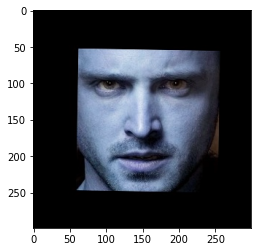

In [ ]:
plt.imshow(x_train[45]);
print("Image belongs to:",Labels[y_train[45]])

Image belongs to: Anna Gunn


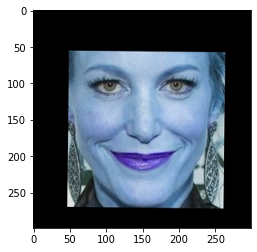

In [ ]:
plt.imshow(x_train[450]);
print("Image belongs to:",Labels[y_train[450]])

Image belongs to: Neil Patrick Harris


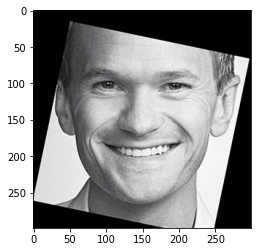

In [ ]:
plt.imshow(x_train[4500]);
print("Image belongs to:",Labels[y_train[4500]])

Image belongs to: rihanna


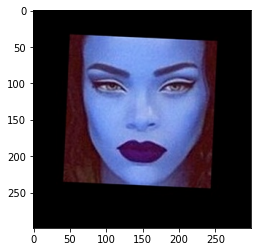

In [ ]:
plt.imshow(x_train[10000]);
print("Image belongs to:",Labels[y_train[10000]])

# **Step 3- Load the pre-trained model and weights**

In [10]:
pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-qr3m36ow
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-qr3m36ow
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp37-none-any.whl size=8326 sha256=7d2b74e823952a34d6d0718848e22405e378564378466801547fef7e52e4a37d
  Stored in directory: /tmp/pip-ephem-wheel-cache-1sur93rr/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [11]:
pip install keras_vggface

In [12]:
pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: six, h5py, scipy, numpy, pyyaml, pillow, keras
Required-by: 


In [13]:
pip install keras_applications

     |████████████████████████████████| 51kB 4.4MB/s 


## **VGG Face Model**

In [ ]:
from keras.engine import  Model
from keras.layers import Input
from keras_vggface.vggface import VGGFace

In [ ]:
# Convolution Features
vgg_features = VGGFace(include_top=False, input_shape=(224, 224, 3), pooling='avg') # pooling: None, avg or max

In [ ]:
# summarize input and output shape
print('Inputs: %s' % vgg_features.inputs)
print('Outputs: %s' % vgg_features.outputs)

Inputs: [<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>]
Outputs: [<KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'global_average_pooling2d')>]


## **Pre_processing the input for VGG Face**

In [14]:
import numpy as np
from keras.preprocessing import image
from keras_vggface import utils

In [ ]:
input=[]
for i in range(len(dir_list)):
  images=os.listdir(path+dir_list[i])
  for ii in images:
    img=image.load_img(path+dir_list[i]+'/'+ii, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = utils.preprocess_input(x, version=1)
    input.append(x)

In [ ]:
len(input)

10770

In [ ]:
#input[0]

## **Step 4- Generate Embedding vectors for each face in the dataset.**

Was unable to generate Embedding Vectors for all images since the google colab session crashes giving insufficient RAM as the error. 
Hence, Generating Embedding Vectors for First 500 images only.

In [ ]:
embedding=[]
for i in range(500):
    preds=vgg_features.predict(input[i])
    embedding.append(preds)
    #print('Predicted:', utils.decode_predictions(preds))


In [ ]:
embedding[0]

array([[6.7288893e-01, 1.3527395e+00, 4.7313771e+00, 9.6896620e+00,
        2.4836974e+00, 1.1729058e+00, 9.0303695e-01, 1.6399707e-01,
        5.8675227e+00, 5.0915532e+00, 1.8347385e+00, 1.8737859e+00,
        2.6817791e+00, 8.1155919e-02, 2.6991403e+00, 4.3476665e-01,
        4.7153363e-01, 3.8823080e+00, 1.4243428e-01, 1.2445395e+00,
        5.6037450e-01, 5.4325261e+00, 6.7759027e+00, 1.1650712e+00,
        4.8225694e+00, 2.6093235e+00, 6.6771178e+00, 1.4311265e+00,
        7.2359306e-01, 4.4233785e+00, 2.2211368e+00, 3.2130644e+00,
        1.9241902e+00, 9.0502572e-01, 1.4779526e+00, 1.5297118e+01,
        9.1794825e+00, 2.4525337e+00, 2.5165951e+00, 5.2738590e+00,
        6.1740036e+00, 7.3637211e-01, 5.4081244e+00, 2.1066070e+00,
        5.8045549e+00, 3.4740238e+00, 1.0276052e+01, 1.8719764e+00,
        2.0540423e+00, 3.5055575e+00, 8.1882018e-01, 1.6655868e+00,
        1.7242942e+00, 5.3325720e+00, 2.6298265e+00, 2.8709235e+00,
        7.3609334e-01, 2.1759096e-01, 4.2875835e

In [ ]:
embedding[1]

array([[8.44157982e+00, 0.00000000e+00, 7.69084740e+00, 4.89334869e+00,
        2.02085590e+00, 1.59857217e-02, 7.07306528e+00, 0.00000000e+00,
        4.71142530e+00, 5.55743265e+00, 3.92272043e+00, 4.45531845e+00,
        5.77905655e-01, 0.00000000e+00, 4.92758942e+00, 3.38864654e-01,
        2.49664515e-01, 6.30608988e+00, 9.28778648e-01, 4.31433916e-01,
        2.13474560e+00, 2.43273616e+00, 1.61036873e+00, 5.18660259e+00,
        7.20683765e+00, 5.32001839e-04, 9.67842102e+00, 2.75821149e-01,
        0.00000000e+00, 1.39488548e-01, 3.27426434e-01, 3.24591494e+00,
        1.76462024e-01, 1.84405074e-01, 1.59832394e+00, 1.08251877e+01,
        1.21027708e+00, 2.78567940e-01, 1.75036335e+00, 5.10547829e+00,
        5.92830133e+00, 0.00000000e+00, 1.27927268e+00, 4.73764777e-01,
        0.00000000e+00, 4.84045219e+00, 7.09739685e-01, 9.56572741e-02,
        4.04386330e+00, 3.94621897e+00, 4.72841787e+00, 6.85491264e-01,
        1.09499550e+00, 1.93996336e-02, 3.30680203e+00, 0.000000

In [ ]:
len(embedding)

408

## **Step 5- Build distance metrics for identifying the distance between two given images.**

In [ ]:
from tensorflow.keras import backend as K
from scipy.spatial import distance

def is_match(x,y, thresh=0.5):
	# calculate distance between embeddings 

    score=distance.cosine(x,y)
    if score <= thresh:
      print('Face is a Match (%.3f <= %.3f)' % (score, thresh))
    else:
      print('Face is NOT a Match (%.3f <= %.3f)' % (score, thresh))  


In [ ]:
is_match(embedding[0],embedding[10])
print("Verifying the result with Lables: Images are of :",Labels[y_train[0]]+" and "+Labels[y_train[10]])

Face is a Match (0.315 <= 0.500)
Verifying the result with Lables: Images are of : Aaron Paul and Aaron Paul


In [ ]:
is_match(embedding[300],embedding[310])
print("Verifying the result with Lables: Images are of :",Labels[y_train[300]]+" and "+Labels[y_train[310]])

Face is a Match (0.197 <= 0.500)
Verifying the result with Lables: Images are of : Amaury Nolasco and Amaury Nolasco


In [ ]:
is_match(embedding[175],embedding[190])
print("Verifying the result with Lables: Images are of :",Labels[y_train[75]]+" and "+Labels[y_train[90]])

Face is NOT a Match (0.546 <= 0.500)
Verifying the result with Lables: Images are of : Aaron Paul and Alvaro Morte


In [ ]:
is_match(embedding[100],embedding[400])
print("Verifying the result with Lables: Images are of :",Labels[y_train[100]]+" and "+Labels[y_train[400]])

Face is NOT a Match (0.645 <= 0.500)
Verifying the result with Lables: Images are of : Alvaro Morte and Amaury Nolasco


## **Step 6- Use PCA for dimensionality reduction.**

In [ ]:
np.shape(embedding)

(408, 1, 512)

In [ ]:
data=np.squeeze(embedding)
data.shape

(408, 512)

In [ ]:
data=pd.DataFrame(data)

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
pca=PCA(n_components=100)

In [ ]:
pca.fit(data)

print("Eigen Values are\n",pca.explained_variance_)

print("\nEigen Vectors are \n",pca.components_)

print("\nPercentage of variation explained by each eigen Vector\n",pca.explained_variance_ratio_)

print("\n Cumulative Variance Explained\n",np.cumsum(pca.explained_variance_ratio_))

Eigen Values are
 [1587.403     1053.044      627.05206    494.1566     184.48637
  138.59923    130.89919    112.67447    107.09018     99.93202
   74.620674    73.73775     72.52093     70.268       67.26396
   59.87642     58.8656      55.31009     53.269638    50.486176
   47.220325    46.25434     43.806572    42.919315    40.941647
   39.963886    39.51137     37.620472    35.228195    34.52175
   32.60589     32.199604    31.126984    29.879938    29.56705
   27.377745    26.490004    25.597433    25.325699    24.064732
   23.092352    22.446198    22.071106    21.059908    20.6367
   20.416618    20.0058      19.266659    18.679684    18.452276
   17.699392    17.454758    17.135582    16.647       16.587976
   15.781009    15.636342    15.247299    14.861395    14.324582
   13.942634    13.706895    13.528457    13.193049    13.069763
   12.345745    12.246383    12.059581    11.61263     11.41315
   11.123972    10.878388    10.739013    10.56683     10.447736
   10.285941   

In [ ]:
cov_mat=np.cov(data.T)
#print("Cov mat is \n",cov_mat)

eig_val,eig_vec=np.linalg.eig(cov_mat)

e_sum=sum(eig_val)
   
var=[(eig_val[i]/e_sum) for i in range(len(eig_val))] 

cum_val=np.cumsum(var)

#print(f'Variance explained  by each PC = {np.array(var).round(2)}')
#print("Cumulative Variance Explained =", np.array(cum_val).round(2))

In [ ]:
#var[:200]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


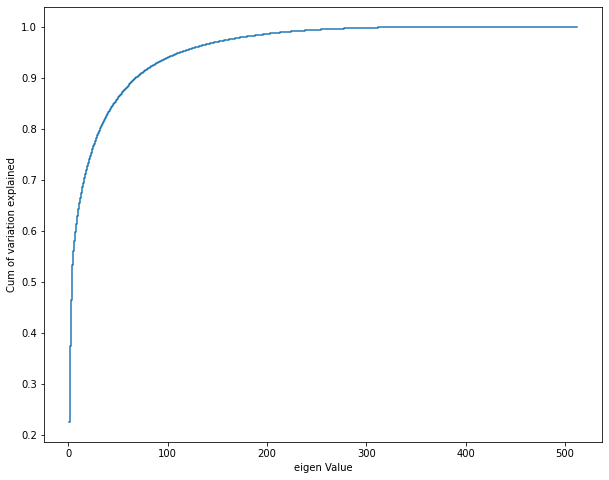

In [ ]:
'PLOT - CUMULATIVE VARIATON EXPLAINED vs EIGEN VALUE'
plt.figure(figsize=(10,8));
plt.step(list(range(1,513)),cum_val, where='mid');
plt.ylabel('Cum of variation explained');
plt.xlabel('eigen Value');
plt.show();

## **Based on Graph above, we take no of components=150**

In [ ]:
pca=PCA(n_components=150)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_train=pca.transform(data)

In [ ]:
y_train=np.array(y_train)
y_train=y_train[:408]

In [ ]:
print(x_train.shape)
print(y_train.shape)

(408, 150)
(408,)


## **Step 7- Build an SVM classifier in order to map each image to its right person.**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100],
             'kernel':['linear','rbf','poly','sigmoid'],
             'gamma':[10,1, 0.1, 0.01, 0.001]}

grid = GridSearchCV(SVC(), param_grid)

grid.fit(x_train, y_train)
print(grid.best_params_)


{'C': 0.1, 'gamma': 10, 'kernel': 'linear'}


In [ ]:
SVM_Model = grid.best_estimator_

## **Step 8- Import the the test image. Display the image. Use the SVM trained model to predict the face.**

In [7]:
path="/content/pins/PINS/pins_Amanda Crew/Amanda Crew10.jpg"

In [15]:
img=image.load_img(path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = utils.preprocess_input(x, version=1)

In [ ]:
Test_embedding=vgg_features(x)
#Test_embedding

In [ ]:
pca_embedding=pca.transform(Test_embedding)

In [ ]:
y_predict = SVM_Model.predict(pca_embedding)

In [ ]:
y_predict


array([2])

In [ ]:
x=np.asscalar(y_predict)
x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


2

In [ ]:
Labels[x]

'Amanda Crew'

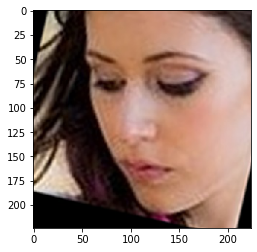

In [16]:
plt.imshow(img)